<a href="https://www.kaggle.com/code/reaperlethal/steel-plate-defect-prediction?scriptVersionId=170803857" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

In [3]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [4]:
labels=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

In [5]:
y=train[labels]
X=train.drop(labels+['id'],axis=1)
X_test=test.drop(['id'],axis=1)
input_shape=X.shape[1],

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

<Axes: >

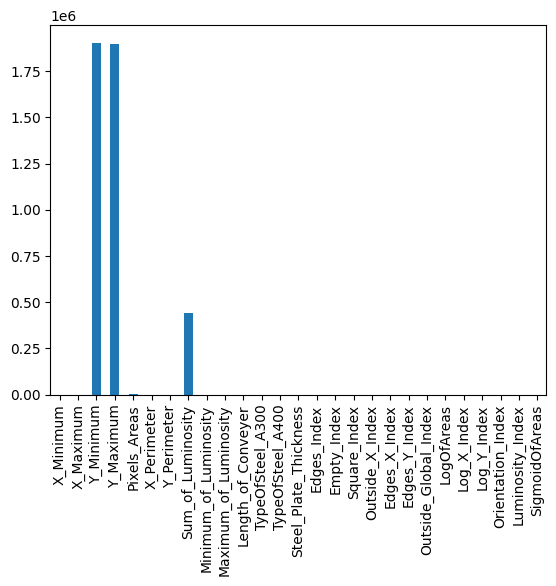

In [7]:
X.std().plot(kind='bar')

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=len(labels),activation='softmax'),
])

2024-04-07 12:53:08.481966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 12:53:08.482053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 12:53:08.619989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=1,
    min_delta=0.001,
    restore_best_weights=True,
)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 27)             │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,347 (2.07 MB)

 Trainable params: 543,293 (2.07 MB)

 Non-trainable params: 54 (216.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=15,
    shuffle=True,
    callbacks=[early_stopping],
)

Epoch 1/15
22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4687 - loss: 1.2949 

I0000 00:00:1712494401.926441      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4859 - loss: 1.2300 - val_accuracy: 0.3366 - val_loss: 5.9148
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5365 - loss: 0.9836 - val_accuracy: 0.2635 - val_loss: 4.7277
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4552 - loss: 1.7600 - val_accuracy: 0.3390 - val_loss: 13.0897


<Axes: title={'center': 'Cross-entropy'}>

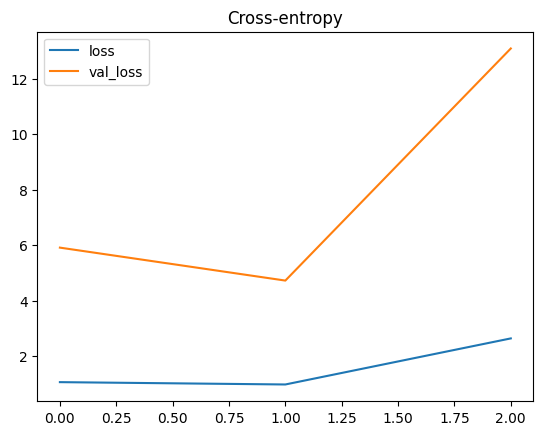

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [14]:
predictions=model.predict(X_test)

401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
len(predictions)

12814

In [16]:
df=pd.DataFrame({'id':pd.Series(test.id)})
df.shape

(12814, 1)

In [17]:
df2 = pd.DataFrame(predictions, columns=labels)
df2.shape

(12814, 7)

In [18]:
d=pd.concat([df,df2],axis=1)
d

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.629778,2.722459e-10,8.089503e-09,3.789359e-11,5.924893e-08,0.323160,0.047062
1,19220,0.274266,1.075288e-08,1.425020e-07,3.428667e-10,2.540587e-07,0.689757,0.035976
2,19221,0.044207,8.163163e-09,1.099594e-07,2.815661e-10,5.831172e-08,0.926063,0.029729
3,19222,0.210440,4.354224e-11,9.982105e-10,2.644600e-11,6.798981e-09,0.764888,0.024671
4,19223,0.055094,8.703016e-11,2.264766e-09,4.184938e-11,1.020340e-08,0.922310,0.022596
...,...,...,...,...,...,...,...,...
12809,32028,0.418914,7.600273e-08,5.225920e-07,5.513354e-09,2.199607e-06,0.510920,0.070163
12810,32029,0.176570,3.521352e-09,8.503254e-08,5.315717e-10,8.432061e-08,0.791684,0.031746
12811,32030,0.740827,9.134302e-05,1.266862e-03,5.258102e-08,1.214014e-05,0.060972,0.196830
12812,32031,0.416230,1.819389e-08,4.055183e-07,1.215284e-09,6.539414e-07,0.542014,0.041755


In [19]:
output = d
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
